<a href="https://colab.research.google.com/github/KEMAL-MUDIE/Data-visualization-and-analysis-MA5755-at-IIT-Madras/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Kemal Mudie Tosora  
ID : GE22M010 

Course: M.Tech  Data Science

Subject: Data Analysis & Visualization (MA5755)

Week 2 Assignment

In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# SBI stock listed in NSE data for last 5 years.
data=pd.read_csv("/content/last_f_SBIN.NS.csv")

In [5]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-29,313.149994,316.899994,311.000000,312.100006,304.492920,23600898
1,2018-01-30,312.049988,318.850006,311.000000,313.549988,305.907562,25810404
2,2018-01-31,313.000000,316.600006,307.850006,313.250000,305.614899,16409938
3,2018-02-01,316.899994,317.399994,305.000000,306.049988,298.590393,19515991
4,2018-02-02,302.899994,305.750000,295.500000,297.350006,290.102448,23274673


In [6]:
data['Date']=pd.to_datetime(data.Date)

In [7]:
data.shape

(1236, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1236 non-null   datetime64[ns]
 1   Open       1236 non-null   float64       
 2   High       1236 non-null   float64       
 3   Low        1236 non-null   float64       
 4   Close      1236 non-null   float64       
 5   Adj Close  1236 non-null   float64       
 6   Volume     1236 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,353.704936,358.298504,348.604652,353.337338,347.391132,3.230582e+07
std,119.931582,120.666163,119.113496,119.898945,120.843198,2.547527e+07
min,151.949997,153.199997,149.449997,150.850006,147.173218,3.312160e+06
25%,267.700012,271.387497,262.787491,267.687508,261.162941,1.529700e+07
50%,316.200012,321.600006,312.300003,316.875000,309.151550,2.338269e+07
75%,457.362488,463.700004,451.399994,456.950012,450.962219,4.189996e+07
max,625.549988,629.549988,617.500000,625.500000,625.500000,2.149557e+08


In [10]:
data.drop('Adj Close',axis=1, inplace=True)

In [11]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

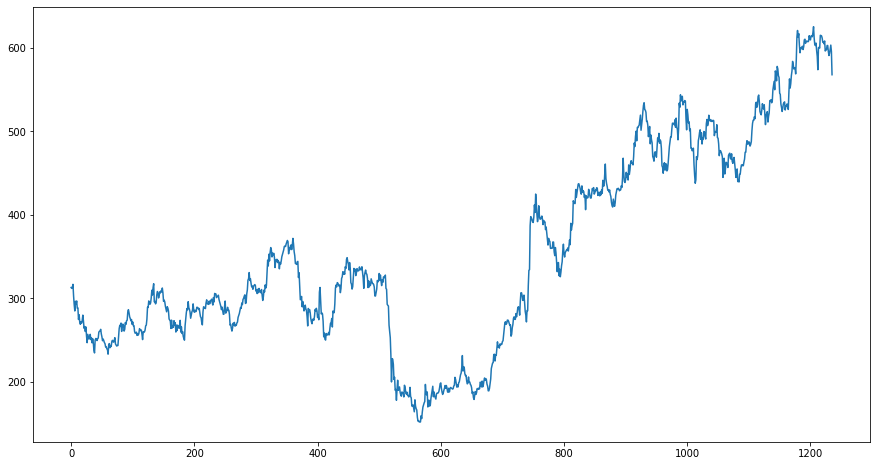

In [12]:
data['Open'].plot(figsize=(15,8))

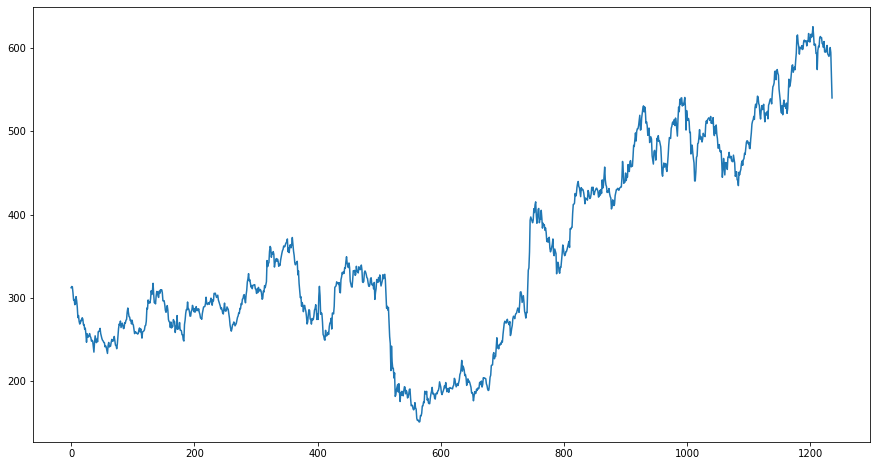

In [13]:
data['Close'].plot(figsize=(15,8))

In [14]:
X_train=data.drop(['Close','Date'],axis=1)

In [15]:
y_train=data['Close']

In [16]:
X_train

,Open,High,Low,Volume
0,313.149994,316.899994,311.000000,23600898
1,312.049988,318.850006,311.000000,25810404
2,313.000000,316.600006,307.850006,16409938
3,316.899994,317.399994,305.000000,19515991
4,302.899994,305.750000,295.500000,23274673
...,...,...,...,...
1231,593.799988,596.599976,590.799988,6750607
1232,598.500000,601.750000,592.950012,6604469
1233,603.500000,604.599976,593.049988,7609623
1234,595.849976,595.849976,567.400024,25686294


In [17]:
y_train

0       312.100006
1       313.549988
2       313.250000
3       306.049988
4       297.350006
           ...    
1231    592.200012
1232    600.450012
1233    594.349976
1234    568.700012
1235    539.950012
Name: Close, Length: 1236, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_Train,X_test,y_Train, y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=0)


In [19]:
X_Train.shape

(865, 4)

In [20]:
X_test.shape

(371, 4)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
model=LinearRegression()

In [22]:
model.fit(X_Train,y_Train)

LinearRegression()

In [23]:
from numpy.lib.function_base import cov
cov(X_train)

array([[1.39246895e+14, 1.52283302e+14, 9.68191877e+13, ...,
        4.48943450e+13, 1.51549427e+14, 2.36967023e+14],
       [1.52283302e+14, 1.66540187e+14, 1.05883478e+14, ...,
        4.90973897e+13, 1.65737607e+14, 2.59152066e+14],
       [9.68191877e+13, 1.05883478e+14, 6.73189524e+13, ...,
        3.12153029e+13, 1.05373211e+14, 1.64764569e+14],
       ...,
       [4.48943450e+13, 4.90973897e+13, 3.12153029e+13, ...,
        1.44743063e+13, 4.88607826e+13, 7.64001183e+13],
       [1.51549427e+14, 1.65737607e+14, 1.05373211e+14, ...,
        4.88607826e+13, 1.64938894e+14, 2.57903176e+14],
       [2.36967023e+14, 2.59152066e+14, 1.64764569e+14, ...,
        7.64001183e+13, 2.57903176e+14, 4.03264789e+14]])

In [24]:
model.coef_

array([-6.08401139e-01,  8.22945509e-01,  7.85696760e-01,  1.31434308e-10])

In [25]:
model.intercept_

-0.2589168983195691

In [26]:
#to predict
predic=model.predict(X_test)

In [27]:
predic

array([448.03052328, 290.64781472, 531.08935991, 329.19231592,
       192.95012988, 275.59869132, 267.70208626, 471.09707181,
       286.00731154, 351.06952478, 476.97514379, 227.90906695,
       296.75986925, 554.27829858, 308.78963508, 257.16693686,
       505.85990675, 539.60116106, 247.46638319, 273.3383355 ,
       606.07224762, 177.86658501, 319.52494258, 520.1258665 ,
       299.22122236, 602.84090526, 282.9684464 , 238.58788019,
       427.69168719, 248.33769994, 249.21698068, 486.57589492,
       191.27455972, 286.61867134, 332.27760002, 390.75909433,
       240.66323519, 494.26587524, 264.82142074, 299.97180047,
       426.38097131, 310.46747114, 316.64078022, 575.92574635,
       499.57404834, 512.53690137, 290.21205392, 152.74825777,
       333.10055213, 218.94391484, 425.87579439, 603.55262546,
       288.62839479, 202.79120478, 252.76027382, 489.71289268,
       317.23081303, 402.97900083, 353.46182645, 281.06862227,
       468.76120176, 431.96952034, 290.79906656, 276.59

In [28]:
X_test

,Open,High,Low,Volume
960,457.049988,458.250000,444.500000,16617447
152,295.899994,295.899994,289.450012,23716678
1156,533.000000,535.799988,527.799988,8745887
501,322.000000,330.950012,322.000000,62516057
625,198.449997,198.649994,191.500000,54787889
...,...,...,...,...
903,449.200012,455.799988,439.600006,19241170
1096,484.000000,488.250000,481.600006,11497832
948,475.750000,481.500000,470.049988,16653993
200,283.450012,289.549988,283.049988,16167419


In [29]:
predic.shape

(371,)

In [30]:
df=pd.DataFrame({'Actual Price':y_test,'Predicted price':predic})

In [31]:
df

,Actual Price,Predicted price
960,446.000000,448.030523
152,291.649994,290.647815
1156,532.700012,531.089360
501,327.450012,329.192316
625,193.100006,192.950130
...,...,...
903,444.899994,446.940667
1096,486.750000,485.471152
948,473.149994,475.861445
200,287.049988,287.967219


In [32]:
model.score(X_test,y_test)

0.9995492189106121

In [33]:
metrics.mean_absolute_error(y_test,predic)

1.7791185983821662

In [34]:
metrics.mean_squared_error(y_test,predic)

6.2232751844486565

In [35]:
import math
math.sqrt(metrics.mean_squared_error(y_test,predic))

2.4946493109149945

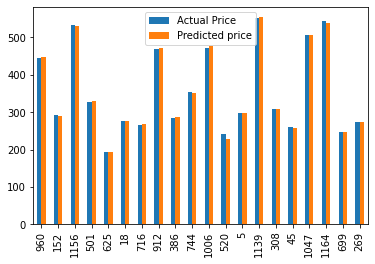

In [36]:
df.head(20).plot(kind='bar')